In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from numpy import *
from sklearn.svm import LinearSVC

from datetime import datetime

from skimage.color import rgb2gray
from skimage.feature import hog

DATA_PATH = "D:/学习/课程资料/计算机视觉/cifar-10-python/cifar-10-batches-py/"

def unpack(fname):
    import pickle
    with open(fname, "rb") as fin:
        dumped = pickle.load(fin, encoding="bytes")
    return dumped

def reshape(data):
    img = np.zeros((32, 32, 3), 'uint8')
    img[..., 0] = np.reshape(data[:1024], (32, 32))
    img[..., 1] = np.reshape(data[1024:2048], (32, 32))
    img[..., 2] = np.reshape(data[2048:3072], (32, 32))
    return img

N = 5
test_num = 10000
bestLoss = 100000
bestWeights = 0
loss = []

batches_meta = unpack(DATA_PATH + "batches.meta")
data_batches = [
    unpack(DATA_PATH + "data_batch_" + str(i+1))
    for i in range(5)
]
test_batch = unpack(DATA_PATH + "test_batch")

In [2]:
# 将图片转换成灰度图并提取出边缘特征
for i in range(N):
    data_batches[i][b"data"] = [hog(rgb2gray(reshape(img))) for img in data_batches[i][b"data"]]

# 将所有的图片汇总起来放到一个对象里，每个元素为一个数组，分别为hog值与分类
data_all = {}
labels = []
hogs = []
for i in range(N):
      for j in range(10000):
            hogs.append(data_batches[i][b"data"][j])
            labels.append(data_batches[i][b"labels"][j])
data_all['labels'] = labels
data_all['data'] = hogs

test_batch[b"data"] = [hog(rgb2gray(reshape(img))) for img in test_batch[b"data"]]

# 将所有的测试图片汇总起来放到一个对象里，每个元素为一个数组，分别为hog值与分类
test_all = {}
labels = []
hogs = []

for i in range(test_num):
      hogs.append(test_batch[b"data"][i])
      labels.append(test_batch[b"labels"][i])
test_all['labels'] = labels
test_all['data'] = hogs

D:\Anaconda\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [3]:
W = np.random.random((10,324))
W = mat(W)

In [4]:
#计算梯度
def evaluate_gradient(f, x, W):
  global bestWeights
  global bestLoss
  global loss
  xmatrics = mat(x["data"])
  matrics = W*xmatrics.T
  fx = f(matrics, x["labels"]) # evaluate function value at original point
  if (fx < bestLoss):
      bestWeights = W
      bestLoss = fx
  loss.append(fx)
#   ks = linspace(1,1000,1000)
#   plt.plot(ks, loss)
  print("loss is", fx)
  grad = np.zeros(W.shape)
  h = 0.0001
  [idx, idy] = W.shape

  for i in range(idx):
        for j in range(idy):
            # evaluate function at x+h
            ix = i
            iy = j
            old_value = W[ix, iy]
            W[ix, iy] = old_value + h # increment by h
            matrics = W*xmatrics.T
            fxh = f(matrics, x["labels"]) # evalute f(x + h)
            W[ix, iy] = old_value # restore to previous value (very important!)

            # compute the partial derivative
            grad[ix, iy] = (fxh - fx) / h # the slope
            # W += - 0.1 * mat(grad)
  return mat(grad)

#定义softmax 损失函数
def loss_fun(data, labelList):
    [x, y] = data.shape
    L = 0
    for i in range(0, y):
          sum = 0
          for j in range(0, x):
                sum += math.exp(data[j, i])
          L += -math.log10(math.exp(data[labelList[i], i]) / sum)
    return L

#进行图片采样
def pics_sample(data, num):
      res = {}
      labelList = []
      dataList = []
      for i in range(0, num):
            randomNum = random.randint(0, 10000 * N)
            randomData = data["data"][randomNum]
            randomLabel = data["labels"][randomNum]
            labelList.append(randomLabel)
            dataList.append(randomData)
      res['data'] = dataList
      res['labels'] = labelList
      return res

#设置步长
step_size = 0.2
i = 1000
times = linspace(1,i,i)

while i > 0:
      # 图片采样
      data = pics_sample(data_all, 256)
      # 计算梯度
      weights_grad = evaluate_gradient(loss_fun, data, W)
      # 更新梯度
      W += - step_size * weights_grad  
      i = i - 1

# pltloss = loss[20:120]

loss is 255.11300820213614
loss is 256.24286877818207
loss is 254.94088761127745
loss is 254.4084421407613
loss is 252.32062246402757
loss is 252.73570678960573
loss is 252.60015352044712
loss is 250.83063559974755
loss is 249.4452435225861
loss is 248.17928254505964
loss is 247.20888591503126
loss is 245.50857120350773
loss is 246.59766290832067
loss is 244.3897307724636
loss is 246.71468709513454
loss is 244.66009374453597
loss is 241.19069958829033
loss is 243.59282659358416
loss is 241.7384478344232
loss is 242.6848263794811
loss is 241.46779751790626
loss is 242.01123251789903
loss is 242.57818759760693
loss is 241.92514451192494
loss is 239.43995106574704
loss is 235.22457999992258
loss is 240.69003971916146
loss is 235.59792708714173
loss is 240.21000261265493
loss is 234.9408782647545
loss is 234.32068068527045
loss is 235.42667509750018
loss is 236.55035878897363
loss is 233.76987844846508
loss is 236.3489874032112
loss is 234.74411077107766
loss is 231.90055769808296
loss is 

loss is 194.33778173921377
loss is 197.03627238014457
loss is 202.77997182660468
loss is 193.20985497374087
loss is 194.45950846543155
loss is 193.25017047925624
loss is 190.65642333315623
loss is 197.7592359769792
loss is 191.88181684227197
loss is 199.52924825270682
loss is 192.8453360258948
loss is 193.09151938521
loss is 193.81667273702408
loss is 194.8502498207251
loss is 197.1359416412421
loss is 193.4737243022855
loss is 191.9807178105012
loss is 192.96330428731358
loss is 192.7779869268373
loss is 203.31777158201905
loss is 190.28900742218036
loss is 187.85691088829358
loss is 191.0611200148066
loss is 195.85950919626936
loss is 191.18326934914776
loss is 199.6015221433072
loss is 192.400442835529
loss is 199.10742783138278
loss is 193.85844769768542
loss is 193.28911936224233
loss is 185.4281355320507
loss is 192.88098660602952
loss is 196.01051775815856
loss is 195.65911010753342
loss is 189.70017170758484
loss is 190.95523034950634
loss is 192.74308996045718
loss is 194.0406

loss is 181.20196885172896
loss is 182.58088787144752
loss is 169.4665324953201
loss is 183.67134396098191
loss is 171.37466296686387
loss is 178.56969760329252
loss is 178.92563881727963
loss is 180.33635349568704
loss is 181.12450237084715
loss is 173.34995189276572
loss is 176.093165461725
loss is 187.91166514430043
loss is 177.66594175099408
loss is 186.699758258144
loss is 189.44929511410947
loss is 173.68450459519255
loss is 187.23845097149407
loss is 188.47036806268065
loss is 179.43450838996634
loss is 179.2401773015521
loss is 188.0573987789711
loss is 180.74855441906178
loss is 189.78236273505985
loss is 184.40434904635077
loss is 179.0470809583098
loss is 188.48116010467857
loss is 178.9008330335065
loss is 175.34343203225086
loss is 180.20709154144535
loss is 177.89519918507503
loss is 186.8919869483221
loss is 185.56735642792415
loss is 185.67069654606402
loss is 181.3459441316511
loss is 175.43919375766453
loss is 172.3216109656996
loss is 177.5794137195204
loss is 176.66

loss is 185.73888975192517
loss is 172.78021857170694
loss is 186.08923465839686
loss is 179.2587118064305
loss is 184.19469394258854
loss is 183.54326654352616
loss is 188.4304613534031
loss is 171.86388445402088
loss is 172.6541501879048
loss is 168.205235342772
loss is 175.29457047784146
loss is 187.15739918722525
loss is 186.1366173451299
loss is 175.47738402866605
loss is 173.96388724738804
loss is 167.91250156681238
loss is 185.03421056412745
loss is 180.77851639613203
loss is 178.06078280865694
loss is 172.7798113733759
loss is 183.50115045342108
loss is 182.29362077432634
loss is 177.09351543318093
loss is 185.50235988173446
loss is 182.56072128298783
loss is 192.49624458722664
loss is 175.56308036538528
loss is 180.14599165649022
loss is 171.73472333639484
loss is 171.13729509960365
loss is 190.90969375940682
loss is 173.79160923812586
loss is 184.4362108382244
loss is 184.45748892552024
loss is 174.74285014954094
loss is 172.09561273135728
loss is 166.82831028905272
loss is 1

best loss 164.62226644991438


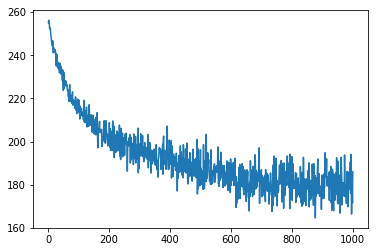

In [5]:
print ("best loss", bestLoss)
plt.plot(times,loss)

In [6]:
right_num = 0
test_matrix = mat(test_all["data"])
test_result = bestWeights * test_matrix.T
for j in range(10000):
      biggest_num = -10000
      result_label = 10
      for i in range(10):
            if (biggest_num < test_result[i, j]):
                  biggest_num = test_result[i, j]
                  result_label = i
      if (result_label == test_all["labels"][j]):
            right_num += 1
print("right rate", right_num/10000)

right rate 0.4568
